QUESTION 1(B)

In [1]:
# NAIVE BAYES MODEL BUILDINDING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

def preprocess_data(X, y):
    # Check data types to decide which Naive Bayes classifier to use
    if all(isinstance(val, str) for val in X.iloc[0]):
        # Text or categorical data - use MultinomialNB
        vectorizer = LabelEncoder()
        X = X.apply(vectorizer.fit_transform)
        clf = MultinomialNB()
    elif all(isinstance(val, (int, float)) for val in X.iloc[0]):
        # Numerical data - use GaussianNB
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        clf = GaussianNB()
    else:
        raise ValueError("Unsupported data type")

    return X, y, clf

def train_and_evaluate(X, y, clf):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Naive Bayes classifier
    clf.fit(X_train, y_train)

    # Predict on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def train_knn_classifier(X, y, k, scale_features=True):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Optionally, scale features if specified
    if scale_features:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Create a KNN classifier with the user-specified k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the KNN classifier
    knn_classifier.fit(X_train, y_train)

    return knn_classifier, X_test, y_test

# Load your dataset and define X and y


# Prompt the user for the value of k


In [3]:
# DATASET

import pandas as pd
file_path= 'C:/Users/ramya/OneDrive/Desktop/dataMining/spam_dataset.csv'
df=pd.read_csv('C:/Users/ramya/OneDrive/Desktop/dataMining/spam_dataset.csv')
df.head()

,word1,word2,word3,word4,spam
0,0,0,0,0,0
1,1,1,1,0,1
2,0,0,1,0,0
3,0,1,1,0,0
4,0,0,1,0,1


In [4]:

X = df.drop(columns=['spam'])
y = df['spam']  

In [5]:
# NAIVE BAYES MODEL APPLICATION ON DATASET

X, y, clf = preprocess_data(X, y)

# Train and evaluate the Naive Bayes classifier
accuracy = train_and_evaluate(X, y, clf)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 20.00%


In [6]:
k = int(input("Enter the value of k for KNN: "))

# Train your KNN classifier with the user-specified k and scale features
knn_classifier, X_test, y_test = train_knn_classifier(X, y, k, scale_features=True)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy with the user-specified k value
accuracy = accuracy_score(y_test, y_pred)

print(f"User-specified K: {k}")
print(f"Accuracy: {accuracy * 100:.2f}%")


Enter the value of k for KNN: 5
User-specified K: 5
Accuracy: 40.00%


QUESTION 2(B)

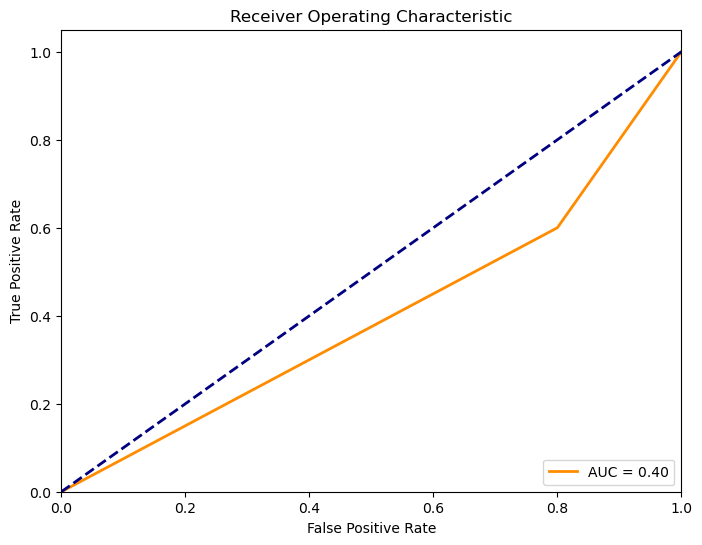

User-specified K: 5
AUC Score: 0.40


In [9]:
# ROC CURVE AND AUC SCORE USING KNN ALGORITHM

y_prob = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Fixed the typo here
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"User-specified K: {k}")
print(f"AUC Score: {auc_score:.2f}")





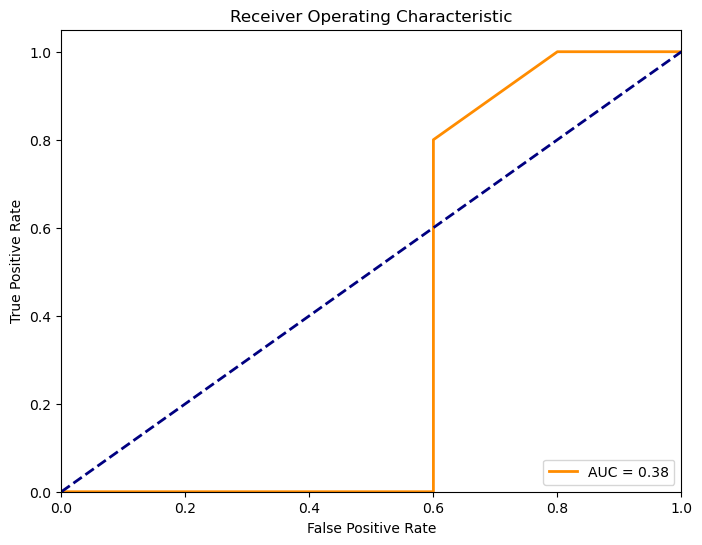

AUC Score: 0.38


In [10]:
# ROC CURVE AND AUC SCORE USING NAIVE BAYES ALGORITHM


def train_and_evaluate(X, y, clf):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Naive Bayes classifier
    clf.fit(X_train, y_train)

    # Predict on the test data
    y_prob = clf.predict_proba(X_test)  # Predict class probabilities

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])

    # Calculate AUC
    auc_score = auc(fpr, tpr)

    return auc_score, fpr, tpr
auc_score, fpr, tpr = train_and_evaluate(X, y, clf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {auc_score:.2f}")



